In [2]:
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.8866
Precision: 1.0000
Recall: 0.0363
F1 Score: 0.0701
ROC AUC Score: 0.5610

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      8042
           1       1.00      0.04      0.07      1073

    accuracy                           0.89      9115
   macro avg       0.94      0.52      0.50      9115
weighted avg       0.90      0.89      0.84      9115



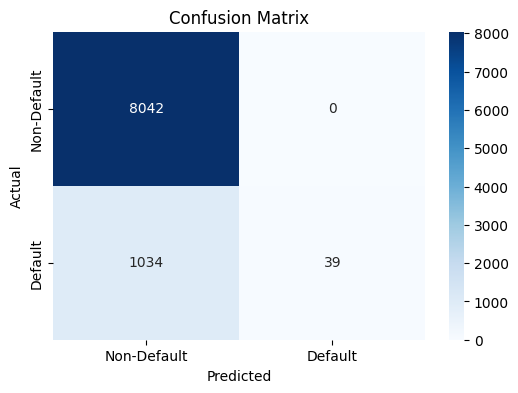

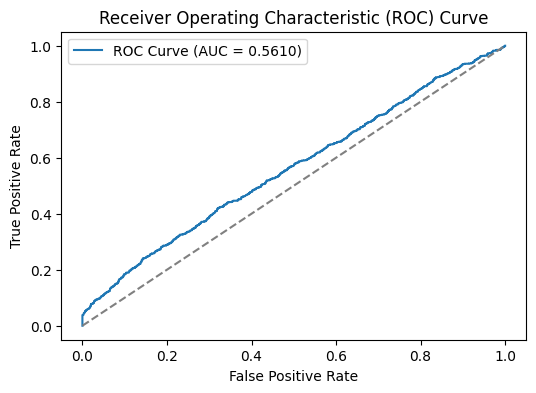

In [3]:
# Load the Processed Dataset
dataset_path = r"C:\Users\vagel\Desktop\CR_Risk Project\final_credit_risk_dataset.csv"
data = pd.read_csv(dataset_path)

# Separate Features & Target
X = data.drop(columns=["Credit_Status"])
y = data["Credit_Status"]


# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

json_path = r"C:\Users\vagel\Desktop\CR_Risk Project\logreg_best_params.json"

# Load best hyperparameters from JSON file
with open(json_path, "r") as f:
    best_params = json.load(f)

# Train the final Logistic Regression model
logreg_model = LogisticRegression(**best_params, solver="liblinear", random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Default", "Default"], yticklabels=["Non-Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
